In [3]:
import requests
from bs4 import BeautifulSoup
import csv

url="https://pokemondb.net/pokedex/all"
response=requests.get(url)

soup=BeautifulSoup(response.text, 'html.parser')

table=soup.find("table", {"id": "pokedex"})

csv_filename="pokemon_data.csv"

with open(csv_filename, 'w', newline='', encoding='utf-8') as csv_file:
    csv_writer=csv.writer(csv_file)
    
    header_row = [header.text for header in table.findAll('th')]
    header_row[2] = "Type"
    csv_writer.writerow(header_row)
    
    for row in table.findAll('tr')[1:]:
        data=[cell.text.strip() for cell in row.findAll('td')]
        types = data[2].split()
        data[2] = types
        
        csv_writer.writerow(data)
        
print(f"Scrapped data from {url} and saved it to {csv_filename}")

Scrapped data from https://pokemondb.net/pokedex/all and saved it to pokemon_data.csv


In [4]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./pokemon_data.csv")
df.head()

,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,"['Grass', 'Poison']",318,45,49,49,65,65,45
1,2,Ivysaur,"['Grass', 'Poison']",405,60,62,63,80,80,60
2,3,Venusaur,"['Grass', 'Poison']",525,80,82,83,100,100,80
3,3,Venusaur Mega Venusaur,"['Grass', 'Poison']",625,80,100,123,122,120,80
4,4,Charmander,['Fire'],309,39,52,43,60,50,65


In [6]:
df.columns

Index(['#', 'Name', 'Type', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed'],
      dtype='object')

In [6]:
x = df['Type']
# x=df['HP']
x

0          ['Grass', 'Poison']
1          ['Grass', 'Poison']
2          ['Grass', 'Poison']
3          ['Grass', 'Poison']
4                     ['Fire']
                 ...          
1190     ['Fairy', 'Fighting']
1191    ['Fighting', 'Dragon']
1192    ['Electric', 'Dragon']
1193       ['Water', 'Dragon']
1194      ['Grass', 'Psychic']
Name: Type, Length: 1195, dtype: object

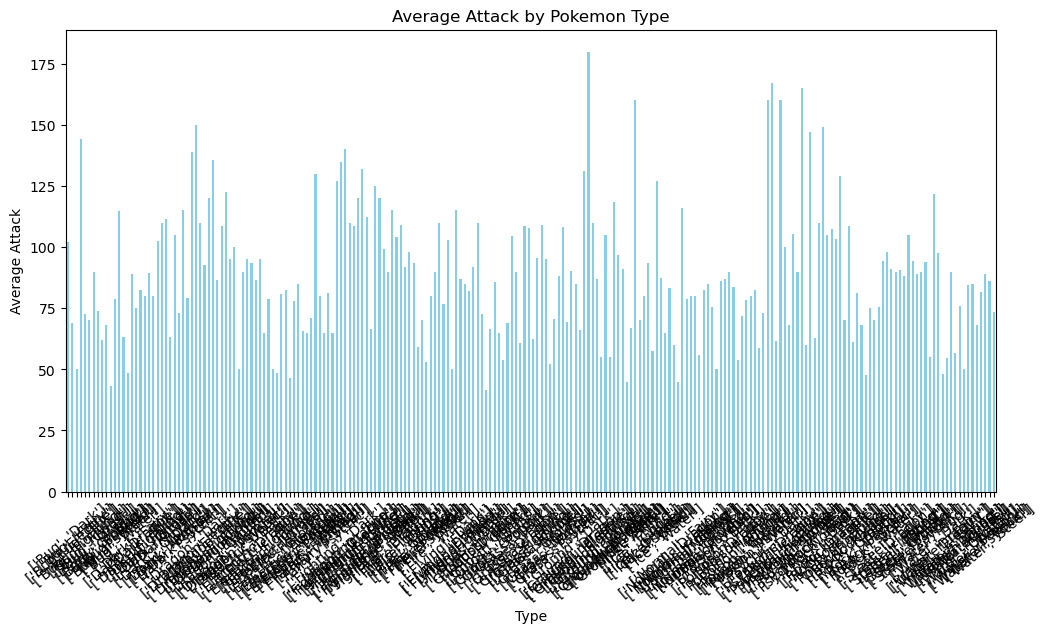

In [17]:
desired_stat = 'Attack'  
grouped_data = df.groupby('Type')[desired_stat].mean()

# Create a bar chart
plt.figure(figsize=(12, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.title(f'Average {desired_stat} by Pokemon Type')
plt.xlabel('Type')
plt.ylabel(f'Average {desired_stat}')
plt.xticks(rotation=40)  # Rotate x-axis labels for better readability
plt.show()

In [18]:
#hypothesis testing

from scipy.stats import ttest_ind

water_hp = df[df['Type'] == 'Water']['HP']
non_water_hp = df[df['Type'] != 'Water']['HP']

t_stat, p_value = ttest_ind(water_hp, non_water_hp)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Water-type Pokemon have higher HP.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in HP between Water-type and non-Water-type Pokemon.")

Fail to reject the null hypothesis: There is no significant difference in HP between Water-type and non-Water-type Pokemon.
